### Import the necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score

#for tuning the model
from sklearn.model_selection import GridSearchCV


import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample  # Import the 'resample' function


#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:.2f}'.format)

### Read the dataset

In [46]:
#reading the dataset
df = pd.read_csv('ulaa_churns.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67549 entries, 0 to 67548
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       67549 non-null  int64  
 1   billing_month                 67549 non-null  object 
 2   billing_year                  67549 non-null  int64  
 3   channel                       67549 non-null  object 
 4   subchannel                    67549 non-null  object 
 5   plan                          67549 non-null  object 
 6   billing_interval              67549 non-null  object 
 7   created_content_folder        67549 non-null  int64  
 8   content_folder_count          67549 non-null  int64  
 9   days_active                   67549 non-null  int64  
 10  auto_cancellation_count       67549 non-null  int64  
 11  renewal_count                 67549 non-null  int64  
 12  survey_completed_count        67549 non-null  int64  
 13  a

In [48]:
#creating billing_month_year
#df['billing_month_year'] = df['billing_month'].astype(str) + '-' + df['billing_year'].astype(str)

#creating billing_interval_plan
#df['plan_billing_interval'] = df['plan'].astype(str) + '-' + df['billing_interval'].astype(str)

#droping the specified columns
columns_to_drop = ['user_id', 'plan', 'billing_year', 'billing_interval', 'avg_survey_response_rating', 'days_active', 'subchannel', 'channel']
df.drop(columns=columns_to_drop, inplace=True)

#get rid of Organic Social
#df.drop(df[df['subchannel'] == 'Organic Social'].index, inplace=True)

#turning churn into a categorical variable
#df['churn'].replace({1: 'Yes', 0: 'No'}, inplace=True)

In [49]:
#df['subchannel'].value_counts()

### Printing the information

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67549 entries, 0 to 67548
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   billing_month                 67549 non-null  object 
 1   created_content_folder        67549 non-null  int64  
 2   content_folder_count          67549 non-null  int64  
 3   auto_cancellation_count       67549 non-null  int64  
 4   renewal_count                 67549 non-null  int64  
 5   survey_completed_count        67549 non-null  int64  
 6   download_abuse_count          67549 non-null  int64  
 7   login_abuse_count             67549 non-null  int64  
 8   session_sharing_abuse_count   67549 non-null  int64  
 9   avg_download_interval_hours   67549 non-null  float64
 10  avg_monthly_downloads         67549 non-null  float64
 11  has_multiple_content_classes  67549 non-null  int64  
 12  video_download_count          67549 non-null  int64  
 13  i

In [51]:
#Creating numerical columns
num_cols=['auto_cancellation_count','content_folder_count','avg_monthly_downloads','video_download_count','image_download_count',
         'audio_download_count','template_download_count','sfx_download_count', 'avg_download_interval_hours', 'has_multiple_content_classes', 
          'has_template_downloads', 'failed_transaction_count', 'created_content_folder', 'survey_completed_count', 'download_abuse_count',
         'login_abuse_count', 'session_sharing_abuse_count', 'renewal_count']

#Creating categorical variables 
cat_cols= ['churn','billing_month', 'payment_method', 'currency']

In [52]:
#checking summary statistics
df[num_cols].describe().T

count   mean     std  min   25%   50%    75%  \
auto_cancellation_count      67549.00   0.12    0.58 0.00  0.00  0.00   0.00   
content_folder_count         67549.00   3.49    6.71 0.00  2.00  2.00   3.00   
avg_monthly_downloads        67549.00 146.89  863.09 1.00 12.50 29.64  74.33   
video_download_count         67549.00 441.92 5152.83 0.00 16.00 53.00 182.00   
image_download_count         67549.00  30.17  258.62 0.00  0.00  0.00   8.00   
audio_download_count         67549.00  70.59  513.42 0.00  0.00  5.00  32.00   
template_download_count      67549.00  22.50  215.96 0.00  0.00  1.00   8.00   
sfx_download_count           67549.00  26.67  299.69 0.00  0.00  0.00   8.00   
avg_download_interval_hours  67549.00  62.56  530.19 0.00  1.89  9.12  33.17   
has_multiple_content_classes 67549.00   0.36    0.48 0.00  0.00  0.00   1.00   
has_template_downloads       67549.00   0.50    0.50 0.00  0.00  1.00   1.00   
failed_transaction_count     67549.00   1.53    4.79 0.00  0.00  0.00   1.00   
created_content_folder       67549.00   1.00    0.05 0.00  1.00  1.00   1.00   
survey_completed_count       67549.00   0.37    0.94 0.00  0.00  0.00   0.00   
download_abuse_count         67549.00   0.20    5.50 0.00  0.00  0.00   0.00   
login_abuse_count            67549.00   0.01    0.43 0.00  0.00  0.00   0.00   
session_sharing_abuse_count  67549.00   0.00    0.01 0.00  0.00  0.00   0.00   
renewal_count                67549.00  14.60   18.62 0.00  5.00  8.00  17.00   

                                   max  
auto_cancellation_count          38.00  
content_folder_count            730.00  
avg_monthly_downloads         78523.00  
video_download_count         721064.00  
image_download_count          26548.00  
audio_download_count          59552.00  
template_download_count       41784.00  
sfx_download_count            44564.00  
avg_download_interval_hours   48433.00  
has_multiple_content_classes      1.00  
has_template_downloads            1.00  
failed_transaction_count        545.00  
created_content_folder            1.00  
survey_completed_count           70.00  
download_abuse_count           1041.00  
login_abuse_count                45.00  
session_sharing_abuse_count       1.00  
renewal_count                   799.00

In [53]:
#Calculating the upper whisker for renewal counts
Q1 = df['renewal_count'].quantile(q=0.25) #First quartile
Q3 = df['renewal_count'].quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

renewal_upper_whisker = Q3 + 1.5*IQR   #Upper Whisker
print(renewal_upper_whisker)

35.0


In [54]:
df_renewal_filtered = df[df['renewal_count'] < renewal_upper_whisker]

In [55]:
df_renewal_filtered['renewal_count'].describe().T

count   60482.00
mean        9.41
std         7.39
min         0.00
25%         5.00
50%         7.00
75%        13.00
max        34.00
Name: renewal_count, dtype: float64

In [56]:
df_renewal_filtered_churns = df_renewal_filtered[df_renewal_filtered['churn'] == 'Yes']

In [57]:
df_renewal_filtered_churns['renewal_count'].describe().T

count   43278.00
mean        9.23
std         6.85
min         0.00
25%         5.00
50%         7.00
75%        11.00
max        34.00
Name: renewal_count, dtype: float64

In [58]:
df_renewal_filtered_active = df_renewal_filtered[(df_renewal_filtered['churn'] == 'No') & (df_renewal_filtered['renewal_count'] > 0)]

In [59]:
df_renewal_filtered_active['renewal_count'].describe().T

count   17124.00
mean        9.90
std         8.58
min         1.00
25%         2.00
50%         7.00
75%        14.00
max        34.00
Name: renewal_count, dtype: float64

In [60]:
#Calculating the upper whisker for the average monthly downloads
Q1 = df['avg_monthly_downloads'].quantile(q=0.25) #First quartile
Q3 = df['avg_monthly_downloads'].quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

downloads_upper_whisker = Q3 + 1.5*IQR   #Upper Whisker
print(downloads_upper_whisker)

167.08333333333331


In [61]:
df_downloads_filtered = df[df['avg_monthly_downloads'] < downloads_upper_whisker]

In [62]:
df_downloads_filtered['avg_monthly_downloads'].describe().T

count   59433.00
mean       37.21
std        35.97
min         1.00
25%        11.00
50%        24.25
75%        51.00
max       167.07
Name: avg_monthly_downloads, dtype: float64

In [63]:
df_downloads_filtered_churns = df_downloads_filtered[df_downloads_filtered['churn'] == 'Yes']

In [64]:
df_downloads_filtered_churns['avg_monthly_downloads'].describe().T

count   40346.00
mean       37.94
std        36.36
min         1.00
25%        11.00
50%        25.00
75%        52.50
max       167.00
Name: avg_monthly_downloads, dtype: float64

In [65]:
#Calculating the upper whisker for the video downloads
Q1 = df['video_download_count'].quantile(q=0.25) #First quartile
Q3 = df['video_download_count'].quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

video_upper_whisker = Q3 + 1.5*IQR   #Upper Whisker
print(video_upper_whisker)

431.0


In [66]:
df_video_filtered = df[df['video_download_count'] < video_upper_whisker]

In [67]:
df_video_filtered['video_download_count'].describe().T

count   58656.00
mean       78.08
std        93.79
min         0.00
25%        13.00
50%        40.00
75%       107.00
max       430.00
Name: video_download_count, dtype: float64

In [68]:
df_video_filtered_churns = df_video_filtered[df_video_filtered['churn'] == 'Yes']

In [69]:
df_video_filtered_churns['video_download_count'].describe().T

count   41165.00
mean       74.32
std        90.70
min         0.00
25%        12.00
50%        38.00
75%       100.00
max       430.00
Name: video_download_count, dtype: float64

In [70]:
df_video_filtered_active = df_video_filtered[df_video_filtered['churn'] == 'No']

In [71]:
df_video_filtered_active['video_download_count'].describe().T

count   17491.00
mean       86.92
std       100.12
min         0.00
25%        14.00
50%        46.00
75%       124.50
max       430.00
Name: video_download_count, dtype: float64

In [72]:
# Create the distribution plot
fig = px.histogram(data_frame=df_downloads_filtered_churns, x='avg_monthly_downloads')

# Show the plot
fig.show()

In [73]:
# Define buckets & bucket labels
buckets = [0, 20, 50, max(df_downloads_filtered_churns['avg_monthly_downloads'])]

bucket_labels = ['Low (0-20)', 'Medium (21-50)', f'High ({buckets[2]}+)']

# Categorize data into buckets
df_downloads_filtered_churns['download_bucket'] = pd.cut(df_downloads_filtered_churns['avg_monthly_downloads'], bins=buckets, labels=bucket_labels)

# Define custom category order
category_order = bucket_labels

# Create the distribution plot
fig = px.histogram(data_frame=df_downloads_filtered_churns, x='download_bucket')

# Add annotations for total user count
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Update category order and labels
fig.update_xaxes(categoryorder='array', categoryarray=category_order, title='Average Monthly Downloads')
fig.update_yaxes(title='User Count')
fig.update_layout(title='Churned Users - Distribution of Average Monthly Downloads')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=12), title_standoff=10),
    yaxis=dict(tickfont=dict(size=12), title_standoff=10),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

# Show the plot
fig.show()


In [74]:
df_downloads_filtered_active = df_downloads_filtered[df_downloads_filtered['churn'] == 'No']

In [75]:
# Create the distribution plot
fig = px.histogram(data_frame=df_downloads_filtered_active, x='avg_monthly_downloads')

# Show the plot
fig.show()

In [76]:
# Define buckets & bucket labels
buckets = [0, 20, 50, max(df_downloads_filtered_active['avg_monthly_downloads'])]

bucket_labels = ['Low (0-20)', 'Medium (21-50)', f'High ({buckets[2]}+)']

# Categorize data into buckets
df_downloads_filtered_active['download_bucket'] = pd.cut(df_downloads_filtered_active['avg_monthly_downloads'], bins=buckets, labels=bucket_labels)

# Define custom category order
category_order = bucket_labels

# Create the distribution plot
fig = px.histogram(data_frame=df_downloads_filtered_active, x='download_bucket')

# Add annotations for total user count
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Update category order and labels
fig.update_xaxes(categoryorder='array', categoryarray=category_order, title='Average Monthly Downloads')
fig.update_yaxes(title='User Count')
fig.update_layout(title='Active Users - Distribution of Average Monthly Downloads')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=12), title_standoff=10),
    yaxis=dict(tickfont=dict(size=12), title_standoff=10),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

# Show the plot
fig.show()

In [77]:
# Create the distribution plot
fig = px.histogram(data_frame=df_video_filtered_churns, x='video_download_count')

# Show the plot
fig.show()

In [78]:
# Define buckets & bucket labels
buckets = [0, 100, 200, max(df_video_filtered_churns['video_download_count'])]

bucket_labels = ['Low (0-100)', 'Medium (100-200)', f'High ({buckets[2]}+)']

# Categorize data into buckets
df_video_filtered_churns['download_bucket'] = pd.cut(df_video_filtered_churns['video_download_count'], bins=buckets, labels=bucket_labels)

# Define custom category order
category_order = bucket_labels

# Create the distribution plot
fig = px.histogram(data_frame=df_video_filtered_churns, x='download_bucket')

# Add annotations for total user count
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Update category order and labels
fig.update_xaxes(categoryorder='array', categoryarray=category_order, title='Video Downloads')
fig.update_yaxes(title='User Count')
fig.update_layout(title='Churned Users - Distribution of Video Downloads')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=12), title_standoff=10),
    yaxis=dict(tickfont=dict(size=12), title_standoff=10),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

# Show the plot
fig.show()


In [79]:
# Define buckets & bucket labels
buckets = [0, 100, 200, max(df_video_filtered_active['video_download_count'])]

bucket_labels = ['Low (0-100)', 'Medium (100-200)', f'High ({buckets[2]}+)']

# Categorize data into buckets
df_video_filtered_active['download_bucket'] = pd.cut(df_video_filtered_active['video_download_count'], bins=buckets, labels=bucket_labels)

# Define custom category order
category_order = bucket_labels

# Create the distribution plot
fig = px.histogram(data_frame=df_video_filtered_active, x='download_bucket')

# Add annotations for total user count
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Update category order and labels
fig.update_xaxes(categoryorder='array', categoryarray=category_order, title='Video Downloads')
fig.update_yaxes(title='User Count')
fig.update_layout(title='Active Users - Distribution of Video Downloads')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=12), title_standoff=10),
    yaxis=dict(tickfont=dict(size=12), title_standoff=10),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'))

# Show the plot
fig.show()


In [80]:
# Calculate the Z-scores for each numeric column
#z_scores = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())

# Set a threshold for outlier detection (e.g., X standard deviations from the mean)
#threshold = 1

# Identify rows with any of the numeric columns having Z-score greater than the threshold
#outlier_mask = (z_scores > threshold).any(axis=1)

# Remove rows with outliers from the DataFrame
#df_without_outliers = df[~outlier_mask]

# Now 'df_without_outliers' contains the DataFrame with outliers removed


In [81]:
#checking summary statistics
#df_without_outliers[num_cols].describe().T

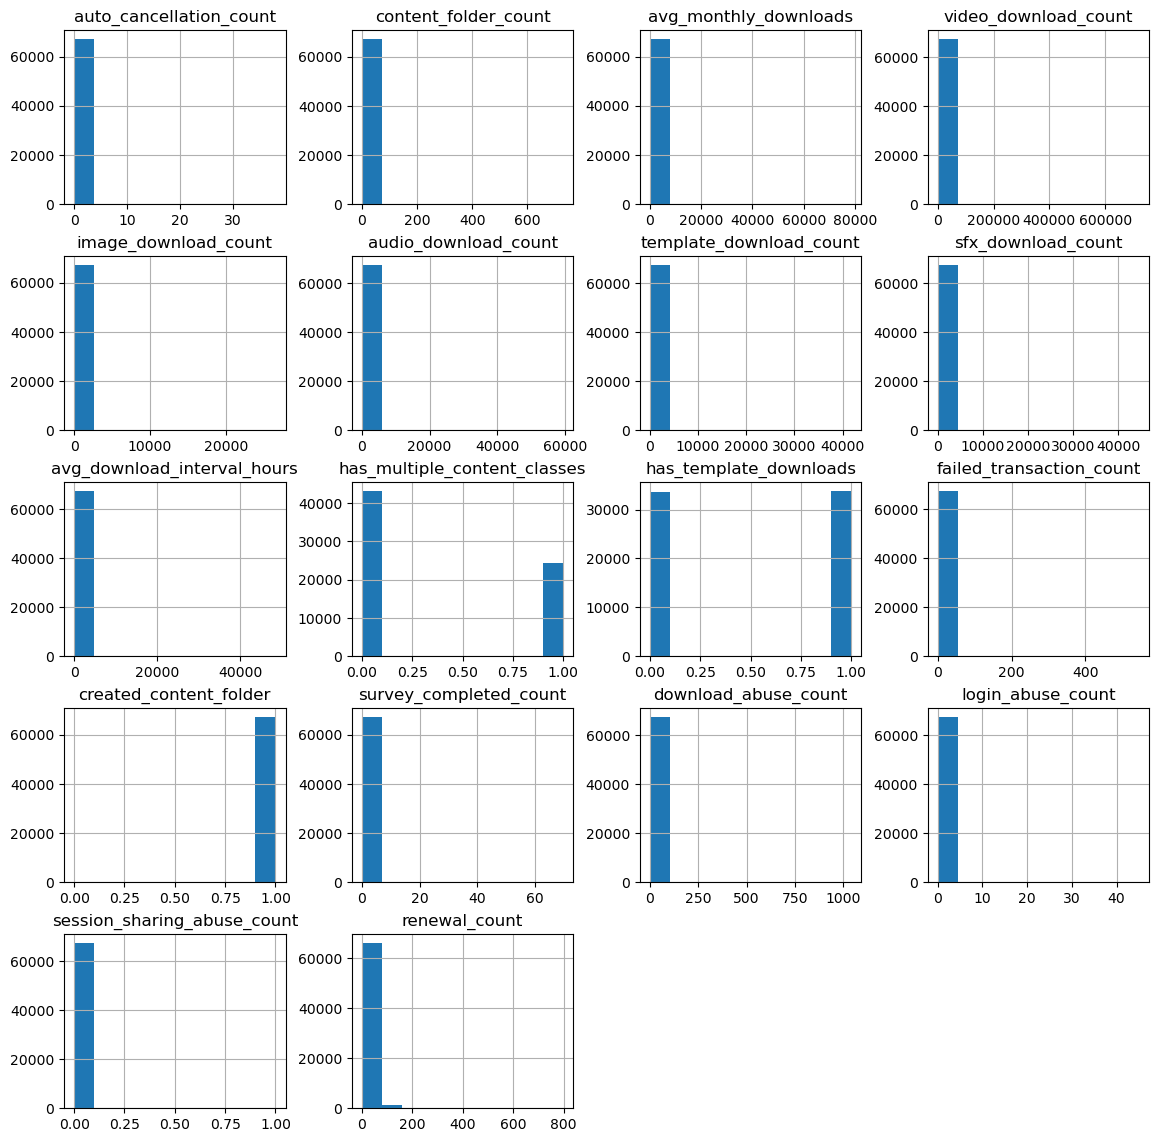

In [82]:
#creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

In [83]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(df_without_outliers[i].value_counts(normalize=True))
    print('*'*40)

NameError: name 'df_without_outliers' is not defined

In [84]:
for i in cat_cols:
    if i!='churn':
        (pd.crosstab(df_without_outliers[i],df_without_outliers['churn'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Churn %')

NameError: name 'df_without_outliers' is not defined

In [85]:
#mean of numerical variables grouped by churn
df_without_outliers.groupby(['churn'])[num_cols].mean()

NameError: name 'df_without_outliers' is not defined

<AxesSubplot:>

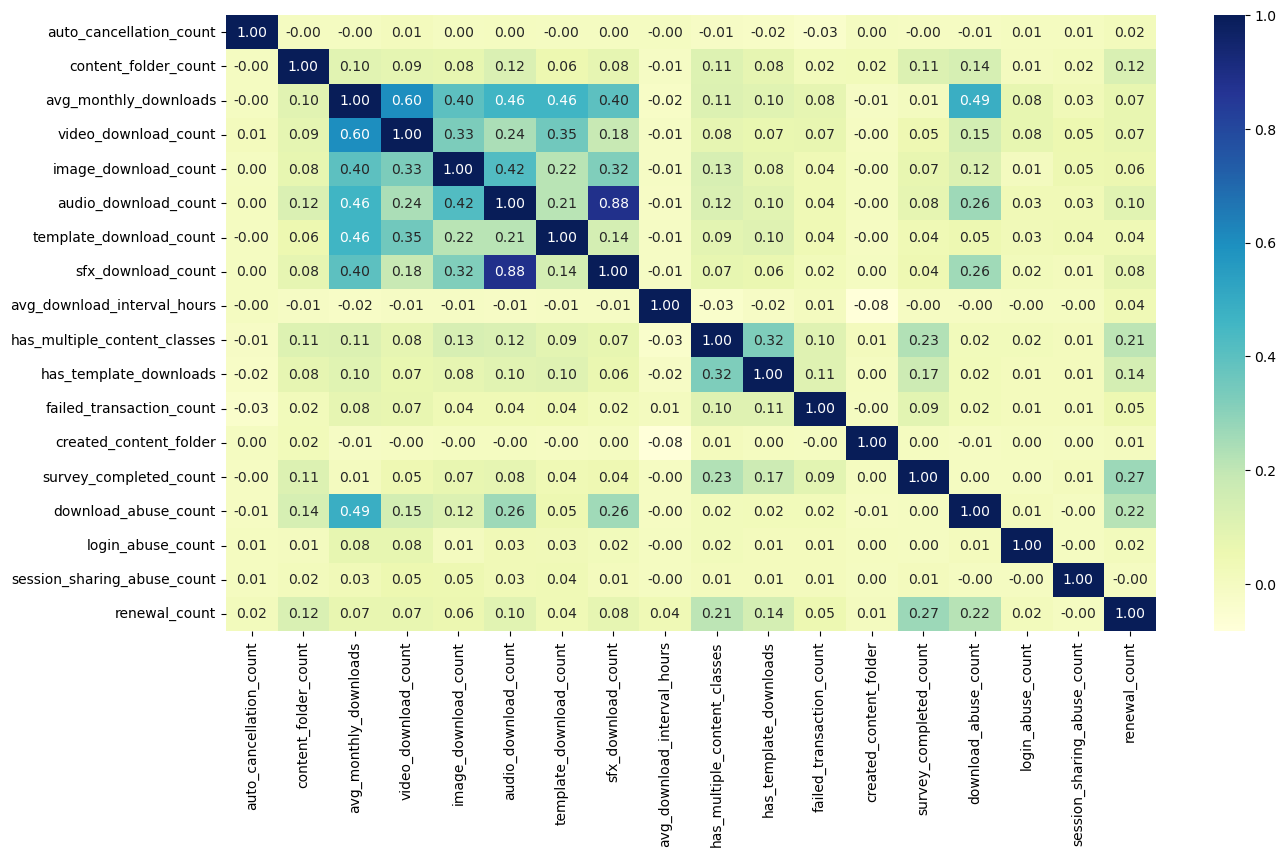

In [86]:
#plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

###  Preparing data for modeling

**Creating dummy variables for categorical Variables**

In [87]:
#creating list of dummy columns
to_get_dummies_for = ['billing_month', 'payment_method', 'currency']

#creating dummy variables
df = pd.get_dummies(data = df, columns= to_get_dummies_for, drop_first= True)      

#mapping overtime and attrition
dict_churn = {'Yes': 1, 'No': 0}

df['churn'] = df.churn.map(dict_churn)

**Separating the independent variables (X) and the dependent variable (Y)**

In [88]:
#Separating target variable and other variables
Y= df.churn
X= df.drop(columns = ['churn'])

In [89]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [90]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting a customer will churn and they do not churn
2. Predicting a customer will not churn and they actually churn

#### Which case is more important? 
* **Predicting a customer will not churn and they actually churn** i.e. losing customers have a substantial impact on revenue, false negatives become more important as they represent missed opportunities to retain valuable customers.

#### How to reduce this loss i.e the need to reduce False Negatives?
* **We want to maximize Recall**,the higher the Recall the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall (minimizing the false negatives) or in other words identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control churn rate.

In [91]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression Model 

In [92]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.71      0.32      0.44     14974
           1       0.75      0.94      0.83     32310

    accuracy                           0.74     47284
   macro avg       0.73      0.63      0.64     47284
weighted avg       0.74      0.74      0.71     47284



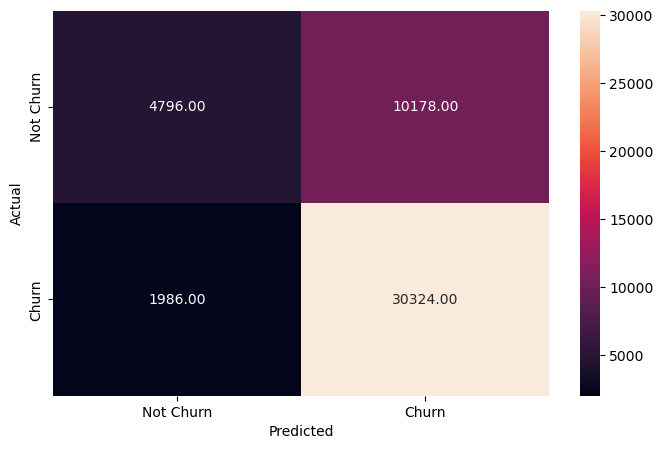

In [93]:
#checking the performance on the training data
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.73      0.33      0.45      6418
           1       0.75      0.94      0.84     13847

    accuracy                           0.75     20265
   macro avg       0.74      0.64      0.65     20265
weighted avg       0.74      0.75      0.72     20265



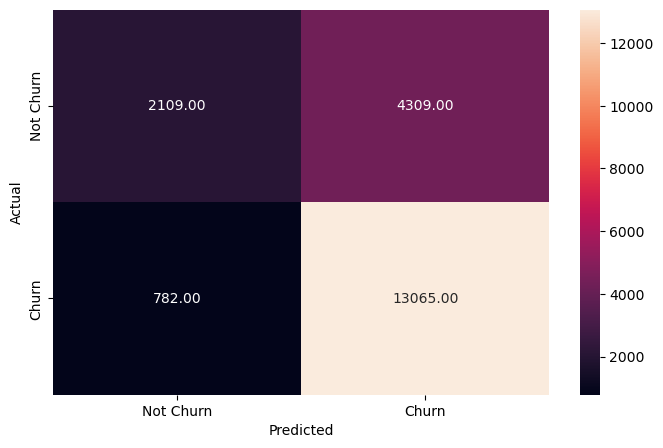

In [94]:
#checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

In [95]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

0
download_abuse_count          0.31
auto_cancellation_count       0.16
avg_monthly_downloads         0.15
image_download_count          0.09
billing_month_October         0.07
billing_month_November        0.07
payment_method_paypal         0.06
billing_month_December        0.05
template_download_count       0.04
currency_GBP                  0.04
billing_month_March           0.04
created_content_folder        0.03
billing_month_January         0.03
has_sfx_downloads             0.02
billing_month_September       0.02
billing_month_August          0.02
has_template_downloads        0.02
session_sharing_abuse_count   0.02
currency_JPY                  0.02
billing_month_February        0.01
content_folder_count          0.01
currency_CAD                  0.00
login_abuse_count             0.00
has_multiple_content_classes -0.00
currency_EUR                 -0.00
audio_download_count         -0.01
billing_month_May            -0.01
avg_download_interval_hours  -0.02
currency_BRL                 -0.02
survey_completed_count       -0.03
billing_month_June           -0.07
currency_USD                 -0.08
sfx_download_count           -0.09
currency_INR                 -0.12
billing_month_July           -0.18
video_download_count         -0.23
renewal_count                -0.46
failed_transaction_count     -1.07

In [96]:
odds = np.exp(lg.coef_[0]) #finding the odds

# Create a DataFrame for the odds and include the feature names as a separate column
odds_df = pd.DataFrame({'odds': odds, 'feature': x_train.columns})

# Sort the DataFrame by the 'odds' column in descending order
odds_df_sorted = odds_df.sort_values(by='odds', ascending=False)

# Set 'feature' as the index and move it to the first column
odds_df_sorted = odds_df_sorted.set_index('feature').reset_index()


odds_df_sorted['probability'] = odds_df_sorted['odds']/(1 + odds_df_sorted['odds'])

odds_df_sorted

feature  odds  probability
0           download_abuse_count  1.37         0.58
1        auto_cancellation_count  1.17         0.54
2          avg_monthly_downloads  1.17         0.54
3           image_download_count  1.10         0.52
4          billing_month_October  1.07         0.52
5         billing_month_November  1.07         0.52
6          payment_method_paypal  1.06         0.51
7         billing_month_December  1.05         0.51
8        template_download_count  1.04         0.51
9                   currency_GBP  1.04         0.51
10           billing_month_March  1.04         0.51
11        created_content_folder  1.03         0.51
12         billing_month_January  1.03         0.51
13             has_sfx_downloads  1.02         0.51
14       billing_month_September  1.02         0.51
15          billing_month_August  1.02         0.50
16        has_template_downloads  1.02         0.50
17   session_sharing_abuse_count  1.02         0.50
18                  currency_JPY  1.02         0.50
19        billing_month_February  1.01         0.50
20          content_folder_count  1.01         0.50
21                  currency_CAD  1.00         0.50
22             login_abuse_count  1.00         0.50
23  has_multiple_content_classes  1.00         0.50
24                  currency_EUR  1.00         0.50
25          audio_download_count  0.99         0.50
26             billing_month_May  0.99         0.50
27   avg_download_interval_hours  0.98         0.49
28                  currency_BRL  0.98         0.49
29        survey_completed_count  0.97         0.49
30            billing_month_June  0.93         0.48
31                  currency_USD  0.92         0.48
32            sfx_download_count  0.91         0.48
33                  currency_INR  0.89         0.47
34            billing_month_July  0.84         0.46
35          video_download_count  0.79         0.44
36                 renewal_count  0.63         0.39
37      failed_transaction_count  0.34         0.26

In [97]:
odds_df_sorted.to_csv('churn_odds.csv', index=False)

In [98]:
# Number of bootstrap iterations
n_iterations = 1000

# Create an array to store bootstrapped coefficients
bootstrap_coefs = np.zeros((n_iterations, len(lg.coef_[0])))

# Perform bootstrapping to estimate coefficients
for i in range(n_iterations):
    # Resample the training data with replacement
    X_boot, y_boot = resample(x_train, y_train, replace=True)
    
    # Fit the logistic regression model on the resampled data
    lg.fit(X_boot, y_boot)
    
    # Store the coefficients from this iteration
    bootstrap_coefs[i] = lg.coef_[0]

# Calculate p-values based on the bootstrapped coefficients
original_coefs = lg.coef_[0]
p_values = 1 - (np.sum(bootstrap_coefs >= original_coefs, axis=0) / n_iterations)

# Add the p-values to the 'odds_df_sorted' DataFrame
odds_df_sorted['p-value'] = p_values

# Display the DataFrame with odds, probabilities, and p-values
odds_df_sorted


feature  odds  probability  p-value
0           download_abuse_count  1.37         0.58     0.07
1        auto_cancellation_count  1.17         0.54     0.43
2          avg_monthly_downloads  1.17         0.54     0.80
3           image_download_count  1.10         0.52     0.38
4          billing_month_October  1.07         0.52     0.13
5         billing_month_November  1.07         0.52     0.27
6          payment_method_paypal  1.06         0.51     0.57
7         billing_month_December  1.05         0.51     0.68
8        template_download_count  1.04         0.51     0.18
9                   currency_GBP  1.04         0.51     0.23
10           billing_month_March  1.04         0.51     0.80
11        created_content_folder  1.03         0.51     0.78
12         billing_month_January  1.03         0.51     0.93
13             has_sfx_downloads  1.02         0.51     0.73
14       billing_month_September  1.02         0.51     0.88
15          billing_month_August  1.02         0.50     0.04
16        has_template_downloads  1.02         0.50     0.54
17   session_sharing_abuse_count  1.02         0.50     0.51
18                  currency_JPY  1.02         0.50     0.53
19        billing_month_February  1.01         0.50     0.14
20          content_folder_count  1.01         0.50     0.10
21                  currency_CAD  1.00         0.50     0.40
22             login_abuse_count  1.00         0.50     0.10
23  has_multiple_content_classes  1.00         0.50     0.13
24                  currency_EUR  1.00         0.50     0.22
25          audio_download_count  0.99         0.50     0.85
26             billing_month_May  0.99         0.50     0.29
27   avg_download_interval_hours  0.98         0.49     0.23
28                  currency_BRL  0.98         0.49     0.24
29        survey_completed_count  0.97         0.49     0.47
30            billing_month_June  0.93         0.48     0.55
31                  currency_USD  0.92         0.48     0.22
32            sfx_download_count  0.91         0.48     0.17
33                  currency_INR  0.89         0.47     0.48
34            billing_month_July  0.84         0.46     0.44
35          video_download_count  0.79         0.44     0.61
36                 renewal_count  0.63         0.39     0.99
37      failed_transaction_count  0.34         0.26     0.49

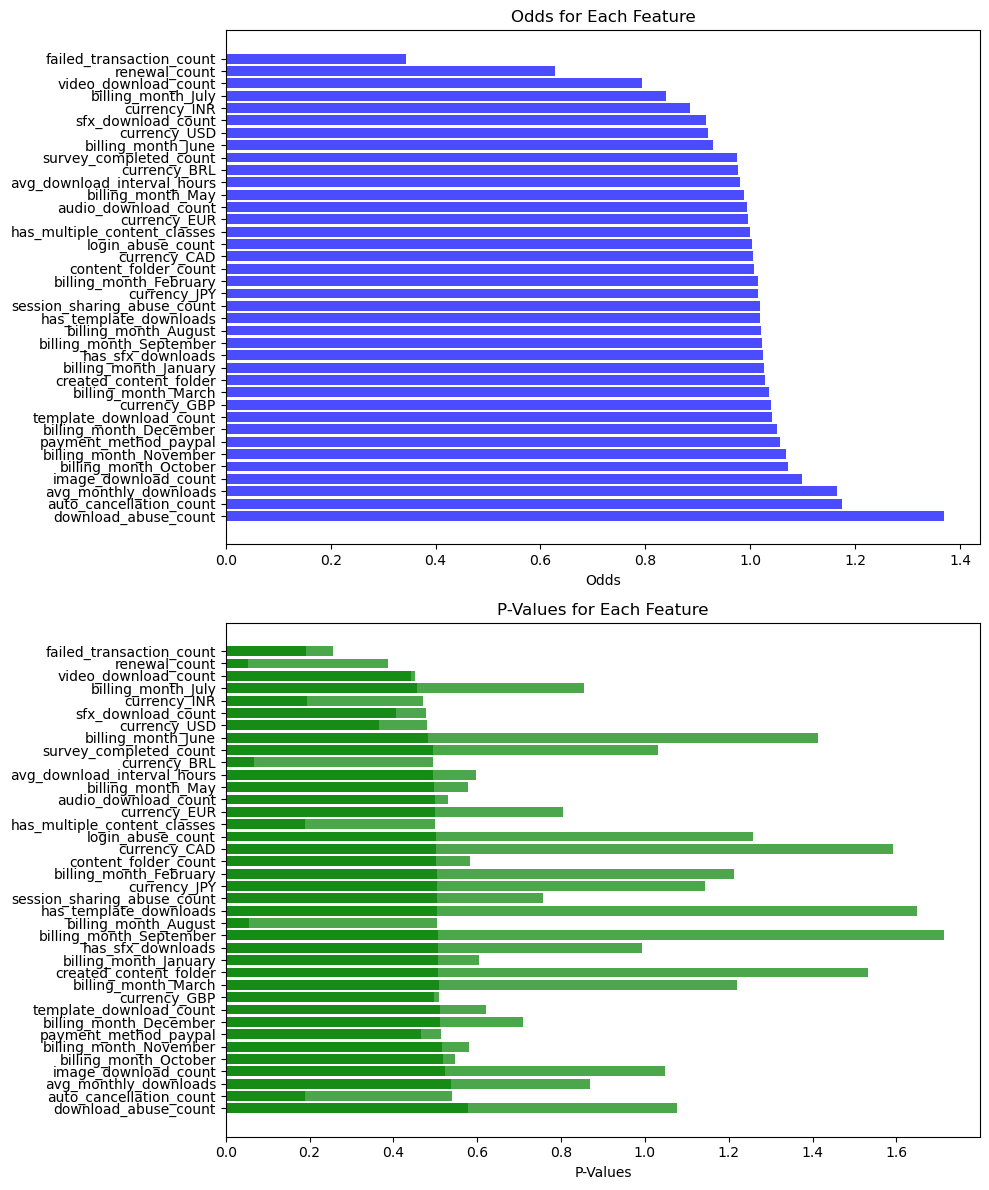

In [57]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot odds
ax1.barh(odds_df_sorted['feature'], odds_df_sorted['odds'], color='b', alpha=0.7)
ax1.set_xlabel('Odds')
ax1.set_title('Odds for Each Feature')

# Plot probabilities
ax2.barh(odds_df_sorted['feature'], odds_df_sorted['probability'], color='g', alpha=0.7)
ax2.set_xlabel('Probability')
ax2.set_title('Probabilities for Each Feature')

# Plot p-values
ax2.barh(odds_df_sorted['feature'], odds_df_sorted['p-value'], color='g', alpha=0.7)
ax2.set_xlabel('P-Values')
ax2.set_title('P-Values for Each Feature')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [60]:
odds_df_sorted.to_csv('odds_prob_p.csv', index=False) 

In [61]:
y_scores_lg = lg.predict_proba(x_train)[:, 1]  # Predicted probabilities of the positive class

# Assuming you have the true labels of the training set 'y_train'
# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_train, y_scores_lg)

print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.7822616356331992


              precision    recall  f1-score   support

           0       0.66      0.49      0.56     14974
           1       0.79      0.88      0.83     32310

    accuracy                           0.76     47284
   macro avg       0.72      0.69      0.70     47284
weighted avg       0.75      0.76      0.75     47284



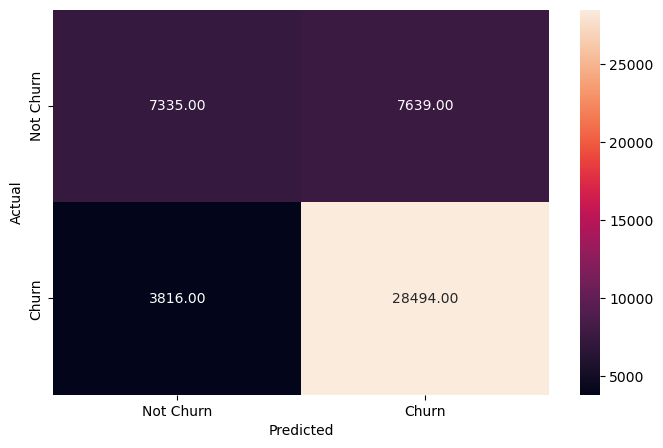

In [62]:
optimal_threshold1=.61
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

In [63]:
# Apply the new threshold to get binary predictions
y_pred_binary = (y_pred_train[:, 1] >= optimal_threshold1).astype(int)

# Calculate the ROC-AUC score with the new threshold
roc_auc = roc_auc_score(y_train, y_pred_binary)

print("ROC-AUC score with the new threshold:", roc_auc)

ROC-AUC score with the new threshold: 0.6858716110710747


In [64]:
# Apply the new threshold to get binary predictions
optimal_threshold1 = 0.61
y_pred_binary = (y_train >= optimal_threshold1).astype(int)

# Calculate the odds
odds = np.exp(lg.coef_[0])

# Create a DataFrame for the odds and include the feature names as a separate column
odds_df = pd.DataFrame({'odds': odds, 'feature': x_train.columns})

# Sort the DataFrame by the 'odds' column in descending order
odds_df_sorted = odds_df.sort_values(by='odds', ascending=False)

# Set 'feature' as the index and move it to the first column
odds_df_sorted = odds_df_sorted.set_index('feature').reset_index()

# Calculate the probabilities using the new threshold
odds_df_sorted['probability'] = odds_df_sorted['odds'] / (1 + odds_df_sorted['odds'])

odds_df_sorted

feature  odds  probability
0           download_abuse_count  1.28         0.56
1        auto_cancellation_count  1.17         0.54
2          avg_monthly_downloads  1.14         0.53
3           image_download_count  1.08         0.52
4          payment_method_paypal  1.06         0.52
5         billing_month_November  1.06         0.51
6          billing_month_October  1.04         0.51
7         billing_month_December  1.04         0.51
8              has_sfx_downloads  1.04         0.51
9                   currency_GBP  1.03         0.51
10        has_template_downloads  1.03         0.51
11         billing_month_January  1.03         0.51
12        created_content_folder  1.03         0.51
13           billing_month_March  1.03         0.51
14        billing_month_February  1.03         0.51
15          billing_month_August  1.02         0.51
16       billing_month_September  1.02         0.51
17   session_sharing_abuse_count  1.01         0.50
18  has_multiple_content_classes  1.00         0.50
19          audio_download_count  1.00         0.50
20             login_abuse_count  0.99         0.50
21                  currency_JPY  0.99         0.50
22                  currency_CAD  0.99         0.50
23          content_folder_count  0.98         0.50
24             billing_month_May  0.98         0.49
25       template_download_count  0.98         0.49
26   avg_download_interval_hours  0.97         0.49
27        survey_completed_count  0.97         0.49
28                  currency_BRL  0.97         0.49
29                  currency_EUR  0.97         0.49
30            billing_month_June  0.93         0.48
31            sfx_download_count  0.91         0.48
32                  currency_USD  0.88         0.47
33                  currency_INR  0.88         0.47
34          video_download_count  0.86         0.46
35            billing_month_July  0.82         0.45
36                 renewal_count  0.63         0.39
37      failed_transaction_count  0.34         0.26

### Linear Determinant Analysis (LDA) Model

In [65]:
#fitting lda model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.67      0.22      0.33     14974
           1       0.72      0.95      0.82     32310

    accuracy                           0.72     47284
   macro avg       0.70      0.58      0.58     47284
weighted avg       0.71      0.72      0.67     47284



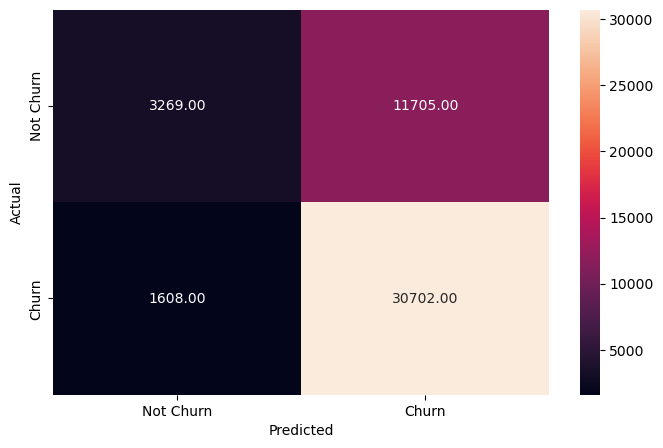

In [66]:
#checking model performance of lda
y_pred_train_lda = lda.predict(x_train)
metrics_score(y_train, y_pred_train_lda)

In [67]:
#creating list of column names
cols=X.columns

#saving coefficients of lda model
coef_lda=lda.coef_

# Create a DataFrame from the coefficients and column names
coef_df = pd.DataFrame({'lda_coefficient': coef_lda.flatten(), 'feature': cols})

# Sort the DataFrame by the 'lda_coefficient' column in descending order
coef_df_sorted = coef_df.sort_values(by='lda_coefficient', ascending=False)


# Set 'feature' as the index and move it to the first column
coef_df_sorted = coef_df_sorted.set_index('feature').reset_index()

# Print the sorted DataFrame
coef_df_sorted

feature  lda_coefficient
0           download_abuse_count             0.18
1          payment_method_paypal             0.12
2        auto_cancellation_count             0.11
3          avg_monthly_downloads             0.08
4          billing_month_October             0.07
5         billing_month_November             0.07
6           image_download_count             0.06
7         billing_month_December             0.05
8                   currency_GBP             0.04
9            billing_month_March             0.03
10         billing_month_January             0.03
11        created_content_folder             0.03
12       billing_month_September             0.02
13          billing_month_August             0.02
14        billing_month_February             0.02
15                  currency_CAD             0.02
16                  currency_JPY             0.01
17          content_folder_count             0.01
18             has_sfx_downloads             0.01
19   session_sharing_abuse_count             0.01
20          audio_download_count             0.00
21       template_download_count            -0.00
22             login_abuse_count            -0.00
23             billing_month_May            -0.01
24                  currency_EUR            -0.01
25        has_template_downloads            -0.01
26  has_multiple_content_classes            -0.02
27   avg_download_interval_hours            -0.03
28                  currency_BRL            -0.04
29            sfx_download_count            -0.04
30        survey_completed_count            -0.05
31            billing_month_June            -0.06
32          video_download_count            -0.09
33                  currency_USD            -0.09
34                  currency_INR            -0.15
35            billing_month_July            -0.18
36      failed_transaction_count            -0.45
37                 renewal_count            -0.50

In [68]:
coef_df_sorted.to_csv('lda_coef.csv', index=False) 

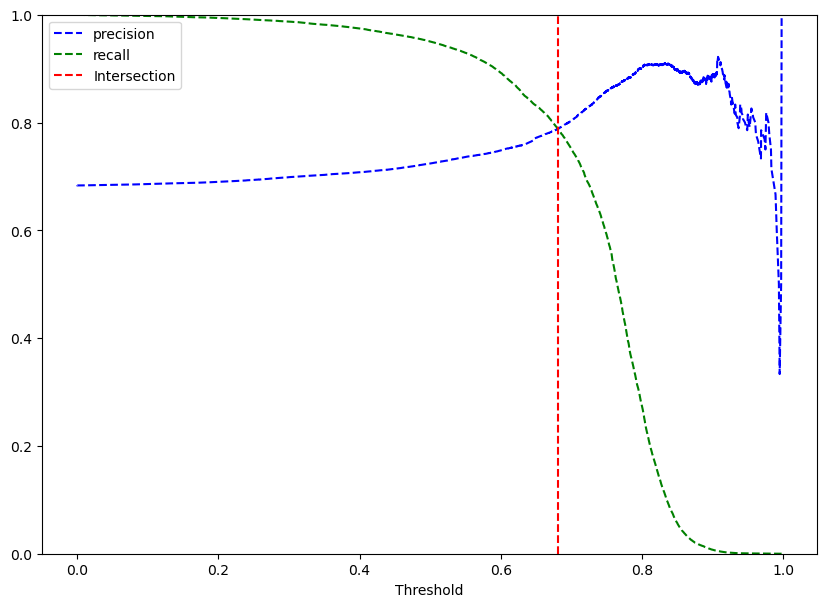

In [69]:
y_scores_lda=lda.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label='precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])


# Find the threshold value where precision and recall cross
intersection_idx = np.argwhere(np.isclose(precisions_lda[:-1], recalls_lda[:-1], atol=1e-5)).flatten()
if len(intersection_idx) > 0:
    intersection_threshold = thresholds_lda[intersection_idx[0]]
    plt.axvline(intersection_threshold, color='r', linestyle='--', label='Intersection')
    plt.legend(loc='upper left')


plt.show()


In [70]:
# Get the probability scores for class 1 (positive class)
y_scores_class1 = y_scores_lda[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_train, y_scores_class1)

# Print the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7450670029640152
